In [22]:
# data managing and display libs
import pandas as pd
import numpy as np
import os
import io

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 

# Loading Data

In [23]:
# read in bytes data
data_stream = "data/acs2015_census_tract_data.csv"#io.BytesIO(data_body)

# create a dataframe
counties_df = pd.read_csv(data_stream, header=0, delimiter=",") 
counties_df.head()

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


# Step 2: Exploratory data analysis EDA - Data cleaning and exploration

## a. Cleaning Data

In [24]:
counties_df.shape

(74001, 37)

In [25]:
counties_df.dropna(inplace=True)
counties_df.shape

(72727, 37)

In [26]:
counties_df.index=counties_df['State'] + "-" + counties_df['County']
counties_df.head()
drop=["CensusTract" , "State" , "County"]
counties_df.drop(drop, axis=1, inplace=True)
counties_df.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
Alabama-Autauga,1948,940,1008,0.9,87.4,7.7,0.3,0.6,0.0,1503,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
Alabama-Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,2.3,0.0,1662,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
Alabama-Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,1.4,0.3,2335,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
Alabama-Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,0.0,0.0,3306,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
Alabama-Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,3.8,0.0,7666,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


## b. Visualizing the data

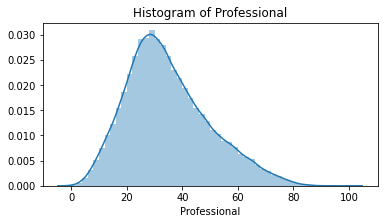

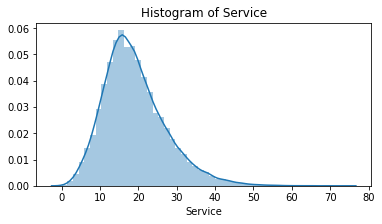

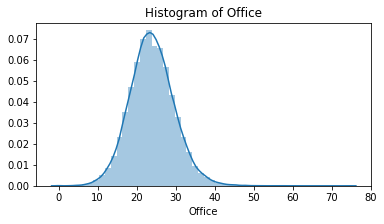

In [27]:
import seaborn as sns

for a in ['Professional', 'Service', 'Office']:
    ax=plt.subplots(figsize=(6,3))
    ax=sns.distplot(counties_df[a])
    title="Histogram of " + a
    ax.set_title(title, fontsize=12)
    plt.show()

## c. Feature engineering
**Data Scaling**- We need to standardize the scaling of the numerical columns in order to use any distance based analytical methods so that we can compare the relative distances between different feature columns. We can use minmaxscaler to transform the numerical columns so that they also fall between 0 and 1.

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
counties_scaled=pd.DataFrame(scaler.fit_transform(counties_df))
counties_scaled.columns=counties_df.columns
counties_scaled.index=counties_df.index

We can see that all of our numerical columns now have a min of 0 and a max of 1.


In [29]:
counties_scaled.describe()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,72727.000000,72727.000000,72727.000000,72727.000000,72727.000000,72727.000000,72727.000000,72727.000000,72727.000000,72727.000000,...,72727.000000,72727.000000,72727.000000,72727.000000,72727.000000,72727.000000,72727.000000,72727.000000,72727.000000,72727.000000
mean,0.080760,0.076500,0.080981,0.168723,0.620640,0.132395,0.007230,0.050270,0.001697,0.081495,...,0.033093,0.032088,0.047708,0.316921,0.083369,0.755607,0.170361,0.128058,0.006419,0.130870
std,0.038831,0.037575,0.039401,0.229443,0.306755,0.217501,0.044628,0.096314,0.012102,0.038641,...,0.058552,0.042850,0.040331,0.105721,0.043795,0.094708,0.085994,0.079016,0.017255,0.084276
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.053988,0.050741,0.053811,0.024000,0.394000,0.007000,0.000000,0.002191,0.000000,0.054465,...,0.004400,0.006826,0.019868,0.243902,0.052772,0.704307,0.112019,0.074074,0.000000,0.074128
50%,0.075450,0.071066,0.075666,0.070000,0.714000,0.037000,0.000000,0.015334,0.000000,0.076240,...,0.015402,0.020478,0.038631,0.306402,0.077163,0.768335,0.156359,0.113169,0.000000,0.111919
75%,0.100919,0.095524,0.101488,0.205000,0.884000,0.143000,0.004000,0.052574,0.000000,0.102135,...,0.037404,0.042662,0.065121,0.379573,0.106333,0.820722,0.212369,0.166667,0.000000,0.164244
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
from sklearn.decomposition import PCA
pca = PCA(.95)
train_data = counties_scaled.values.astype('float32')
pca.fit(train_data)

PCA(n_components=0.95)

In [38]:
PCA_list=['comp_1', 'comp_2', 'comp_3', 'comp_4', 'comp_5']

## d. Deploying the PCA model

In [37]:
result = pca.transform(train_data)

# Population segmentation using unsupervised clustering
Now, we’ll use the Kmeans algorithm to segment the population of counties by the 5 PCA attributes we have created. Kmeans is a clustering algorithm that identifies clusters of similar counties based on their attributes. Since we have ~3000 counties and 34 attributes in our original dataset, the large feature space may have made it difficult to cluster the counties effectively. Instead, we have reduced the feature space to 5 PCA components, and we’ll cluster on this transformed dataset.

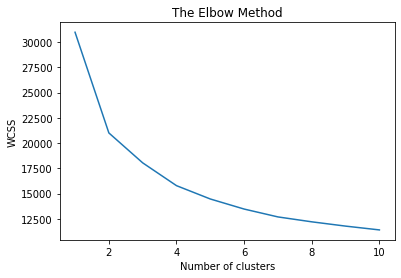

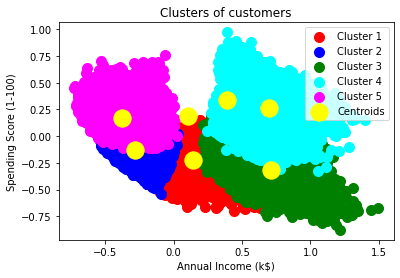

In [47]:
# K-Means Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
X = result#dataset.iloc[:, [3, 4]].values


# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(result)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(result)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## K-means on mall_customer

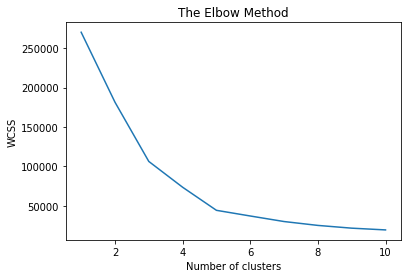

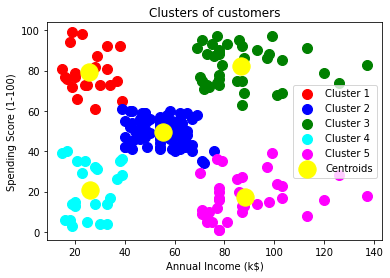

In [46]:
# K-Means Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('data/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values


# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [30]:
from sagemaker import get_execution_role
role = get_execution_role()
from sagemaker import PCA
bucket_name='<my_s3_bucket_name_here>'
num_components=33

pca_SM = PCA(role=role,
          train_instance_count=1,
          train_instance_type='ml.c4.xlarge',
          output_path='data/',
            num_components=num_components)

ValueError: Must setup local AWS configuration with a region supported by SageMaker.